In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import datetime

In [9]:
crime = pd.read_csv('../input/bpd-crime-data/BPD_Part_1_Victim_Based_Crime_Data.csv')

In [10]:
crime.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,11/21/2020,18:38:57,1A,700 LINNARD ST,HOMICIDE,Outside,FIREARM,815.0,SOUTHWEST,EDMONDSON VILLAGE,-76.676511,39.295361,NaN,STREET,NaN,1
1,11/21/2020,7:00:00,4E,1200 COMET MW,COMMON ASSAULT,I,NaN,211.0,SOUTHEAST,PLEASANT VIEW GARDENS,-76.601565,39.292938,NaN,ROW/TOWNHOUSE-OCC,NaN,1
2,11/21/2020,17:00:00,7A,1100 E BELVEDERE AVE,AUTO THEFT,O,NaN,522.0,NORTHERN,GLEN OAKS,-76.597329,39.359944,NaN,STREET,NaN,1
3,11/21/2020,4:30:00,3JF,1100 DUNDALK AVE,ROBBERY - RESIDENCE,I,FIREARM,234.0,SOUTHEAST,GRACELAND PARK,-76.534938,39.281161,NaN,ROW/TOWNHOUSE-OCC,NaN,1
4,11/21/2020,23:37:00,4C,1200 N LUZERNE AVE,AGG. ASSAULT,I,OTHER,332.0,EASTERN,BEREA,-76.581228,39.305433,NaN,ROW/TOWNHOUSE-OCC,Eastern 2,1


In [12]:
crime.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'vri_name1',
       'Total Incidents'],
      dtype='object')

In [13]:
crime.drop(['Longitude','Latitude','Location 1'], axis = 1, inplace = True)

In [14]:
crime.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Premise', 'vri_name1', 'Total Incidents'],
      dtype='object')

In [20]:
crime['CrimeTime'].unique()

array(['18:38:57', '7:00:00', '17:00:00', ..., '22:26:39', '13:38:52',
       '1:52:27'], dtype=object)

In [21]:
before12 = crime[crime['CrimeTime'].lt('12')]['District'].value_counts()
print("Crimes before 12pm: \n", before12.astype(int))

Crimes before 12pm: 
 NORTHEAST    6455
SOUTHEAST    5637
CENTRAL      4856
SOUTHERN     4538
SOUTHWEST    4502
NORTHERN     4497
NORTHWEST    3999
EASTERN      3887
WESTERN      3456
Name: District, dtype: int64


<AxesSubplot:xlabel='Inside/Outside', ylabel='count'>

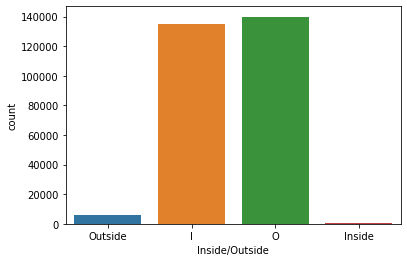

In [22]:
sns.countplot(x = 'Inside/Outside', data = crime)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'SOUTHWEST'),
  Text(1, 0, 'SOUTHEAST'),
  Text(2, 0, 'NORTHERN'),
  Text(3, 0, 'EASTERN'),
  Text(4, 0, 'NORTHWEST'),
  Text(5, 0, 'WESTERN'),
  Text(6, 0, 'SOUTHERN'),
  Text(7, 0, 'NORTHEAST'),
  Text(8, 0, 'CENTRAL')])

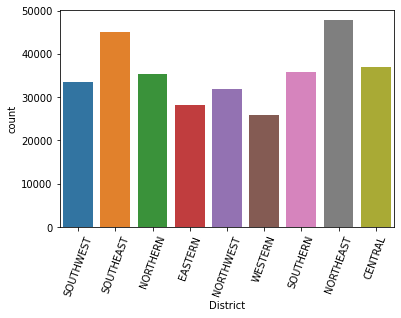

In [52]:
sns.countplot (x = 'District', data = crime)
plt.xticks(rotation = 70)

<AxesSubplot:xlabel='Weapon', ylabel='count'>

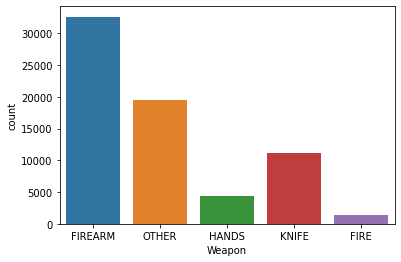

In [24]:
sns.countplot(x = 'Weapon', data = crime)

In [27]:
def crime_details(crimeDetails):
    return crime[crime['District'] == crimeDetails][['Weapon', 'Post', 'Premise', 'Total Incidents', 'vri_name1', 'Description', 'Inside/Outside', 'CrimeCode']]

In [32]:
nw = crime_details('NORTHWEST')

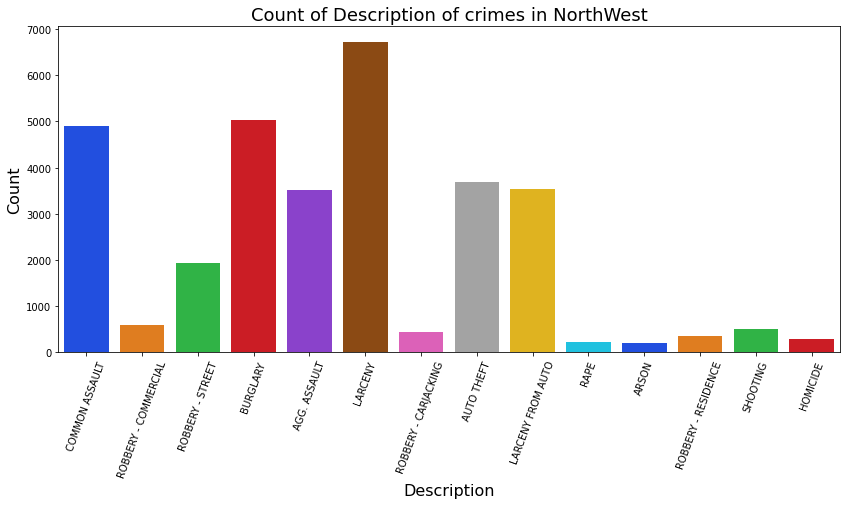

In [39]:
plt.figure(figsize = (14, 6))

ax = sns.countplot(x = 'Description', data = nw, palette = 'bright')
ax.set_title(label = 'Count of Description of crimes in NorthWest', fontsize = 18)

ax.set_xlabel(xlabel = 'Description', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.xticks(rotation = 70)

plt.show()

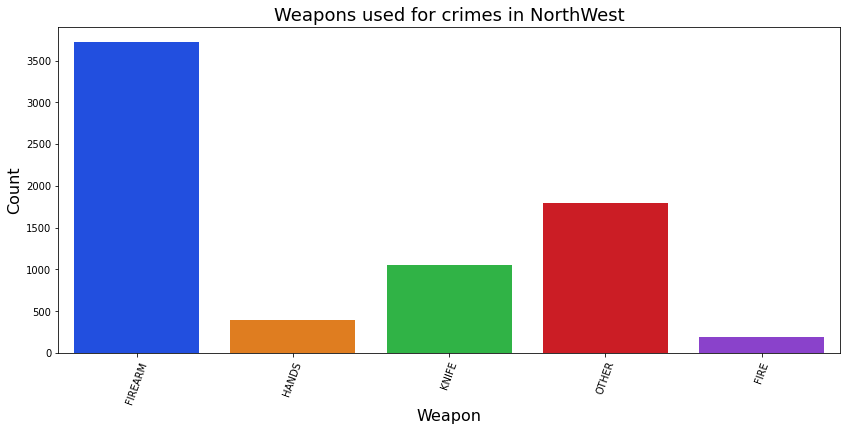

In [40]:
plt.figure(figsize=(14,6))

ax = sns.countplot(x='Weapon', data=nw, palette='bright')
ax.set_title(label='Weapons used for crimes in NorthWest', fontsize=18)

ax.set_xlabel(xlabel='Weapon', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=70)

plt.show()

In [41]:
se = crime_details('SOUTHEAST')

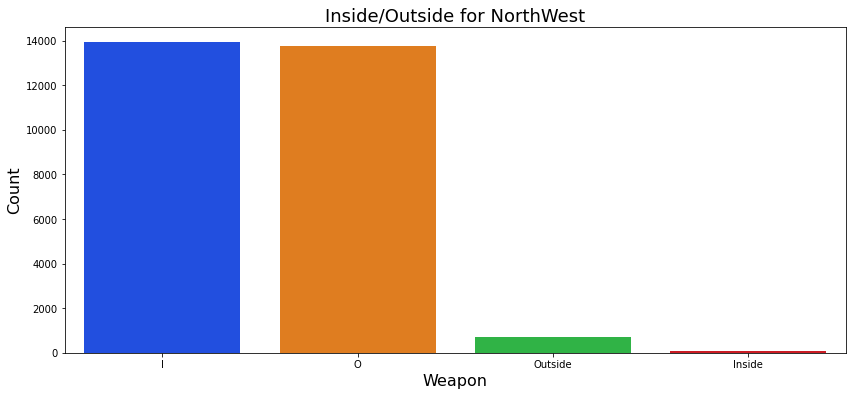

In [54]:
plt.figure(figsize=(14,6))

ax = sns.countplot(x='Inside/Outside', data=nw, palette='bright')
ax.set_title(label='Inside/Outside for NorthWest', fontsize=18)

ax.set_xlabel(xlabel='Weapon', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=0)

plt.show()

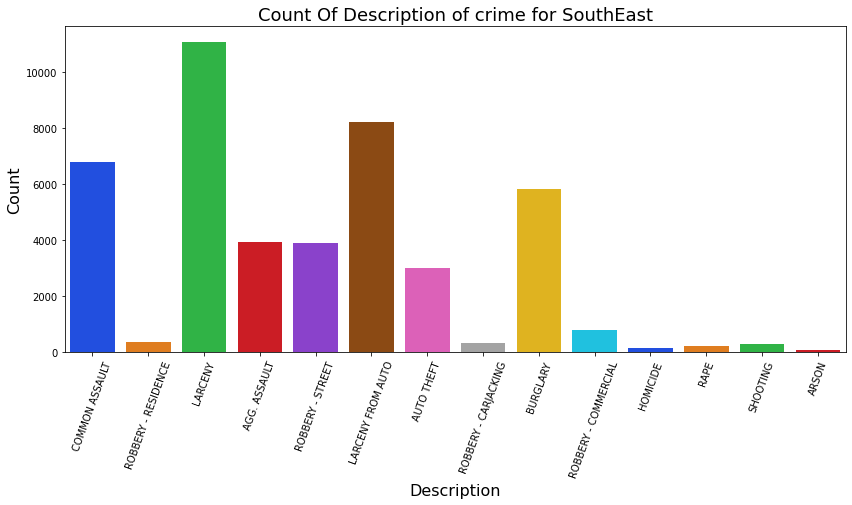

In [55]:
plt.figure(figsize=(14,6))

ax = sns.countplot(x='Description', data=se, palette='bright')
ax.set_title(label='Count Of Description of crime for SouthEast', fontsize=18)

ax.set_xlabel(xlabel='Description', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=70)

plt.show()

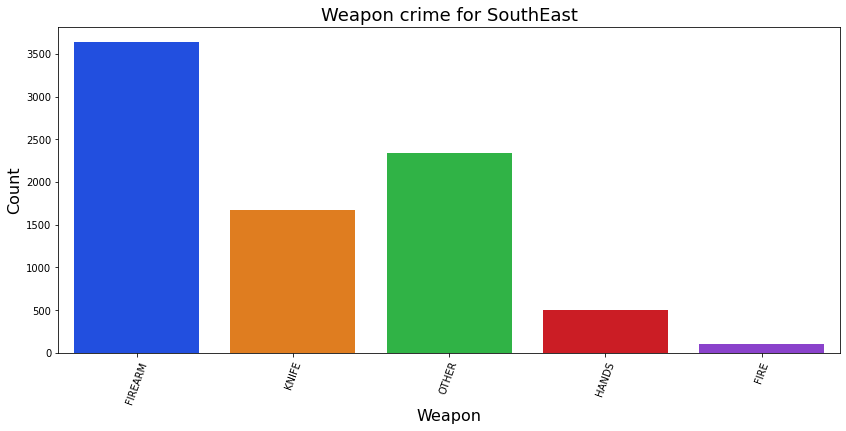

In [56]:
plt.figure(figsize=(14,6))

ax = sns.countplot(x='Weapon', data=se, palette='bright')
ax.set_title(label='Weapon crime for SouthEast', fontsize=18)

ax.set_xlabel(xlabel='Weapon', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=70)

plt.show()

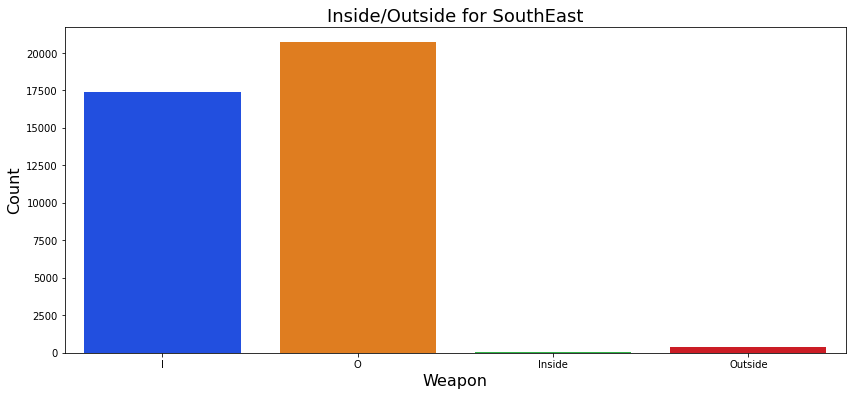

In [58]:
plt.figure(figsize=(14,6))

ax = sns.countplot(x='Inside/Outside', data=se, palette='bright')
ax.set_title(label='Inside/Outside for SouthEast', fontsize=18)

ax.set_xlabel(xlabel='Weapon', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=0)

plt.show()

In [46]:
crimeYear = crime["CrimeDate"].apply(lambda x:x.split("/")).str[2].astype(str)
print('CrimeDate',crimeYear)
crime['crimeYear'] = crimeYear.astype('int')

CrimeDate 0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
321409    1977
321410    1975
321411    1973
321412    1969
321413    1963
Name: CrimeDate, Length: 321414, dtype: object


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='crimeYear', ylabel='Density'>

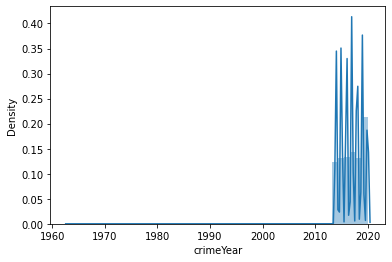

In [48]:
sns.distplot(crime['crimeYear'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, '1963'),
  Text(1, 0, '1969'),
  Text(2, 0, '1973'),
  Text(3, 0, '1975'),
  Text(4, 0, '1977'),
  Text(5, 0, '1978'),
  Text(6, 0, '1979'),
  Text(7, 0, '1980'),
  Text(8, 0, '1981'),
  Text(9, 0, '1982'),
  Text(10, 0, '1985'),
  Text(11, 0, '1988'),
  Text(12, 0, '1993'),
  Text(13, 0, '1995'),
  Text(14, 0, '1998'),
  Text(15, 0, '1999'),
  Text(16, 0, '2000'),
  Text(17, 0, '2001'),
  Text(18, 0, '2003'),
  Text(19, 0, '2004'),
  Text(20, 0, '2006'),
  Text(21, 0, '2007'),
  Text(22, 0, '2008'),
  Text(23, 0, '2009'),
  Text(24, 0, '2010'),
  Text(25, 0, '2011'),
  Text(26, 0, '2012'),
  Text(27, 0, '2013'),
  Text(28, 0, '2014'),
  Text(29, 0, '2015'),
  Text(30, 0, '2016'),
  Text(31, 0, '2017'),
  Text(32, 0, '2018'),
  Text(33, 0, '2019'),
  Text(34, 0, '2020')])

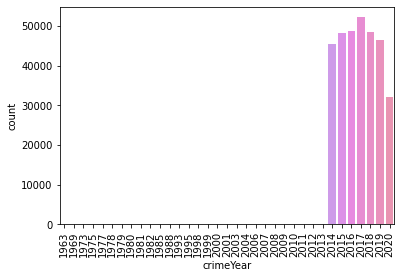

In [49]:
sns.countplot(x='crimeYear',data=crime)
plt.xticks(rotation=90)

In [50]:
crimeMonth = crime["CrimeDate"].apply(lambda x:x.split("/")).str[0].astype(str)
print('CrimeDate',crimeMonth)
crime['crimeMonth'] = crimeMonth.astype('int')

CrimeDate 0         11
1         11
2         11
3         11
4         11
          ..
321409    05
321410    06
321411    07
321412    07
321413    10
Name: CrimeDate, Length: 321414, dtype: object


In [51]:
crime['CrimeTime'] = crime['CrimeTime'].astype('datetime64[ns]')
crime['CrimeTime']
crimeHour = crime.CrimeTime.dt.hour
crimeHour

0         18.0
1          7.0
2         17.0
3          4.0
4         23.0
          ... 
321409     0.0
321410     0.0
321411    23.0
321412    21.0
321413     0.0
Name: CrimeTime, Length: 321414, dtype: float64